In [1]:
import rasterio as ro
from rasterio.plot import show

In [2]:
dtm = ro.open("Data/pre_DTM.tif")
dsm = ro.open("Data/pre_DSM.tif")

In [3]:
dtm.count

1

In [4]:
dsm.count

1

In [5]:
dtm.height

2000

In [6]:
dsm.height

2000

In [7]:
dtm.width

4000

In [8]:
dsm.width

4000

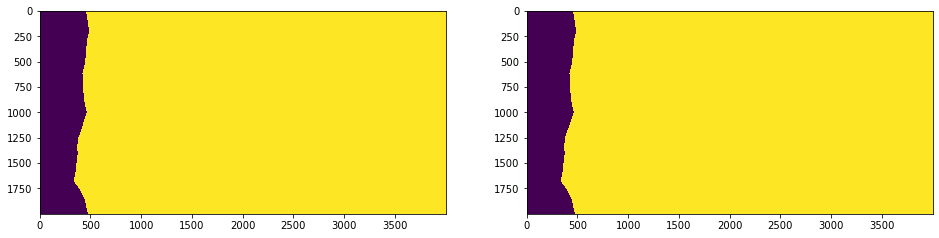

In [14]:
# two images plotted on one canvas; right one is dsm.tif and left one is dsm.tif
import matplotlib.pyplot as plt
fig, (aximage_dtm, aximage_dsm) = plt.subplots(1,2,figsize=(16,8))
show(dtm.read(),ax=aximage_dtm)
show(dsm.read(),ax=aximage_dsm)

[Text(0, 0.5, 'Number of Pixels'), Text(0.5, 0, 'Height(m)')]

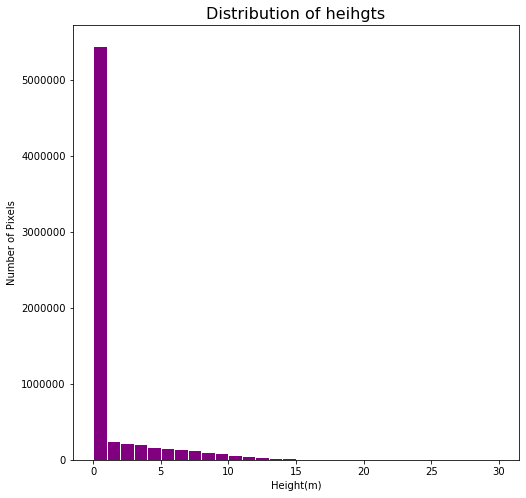

In [10]:
dtm_data = dtm.read(1,masked = True)
dsm_data = dsm.read(1,masked = True)
heights = dsm_data-dtm_data
heights.max()
heights.min()

import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (8,8))
ax.hist(heights.ravel(),bins = range(0,31,1), color = 'purple', edgecolor = 'white')
ax.set_title("Distribution of heihgts", fontsize = 16)
ax.set(xlabel = "Height(m)", ylabel = "Number of Pixels")

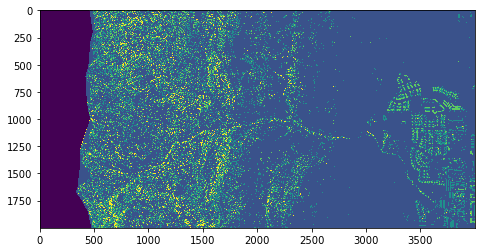

In [11]:
import numpy as np
new_class_bins = [0, 2, 7, 12, np.inf]
reclassified_raster = np.digitize(heights, new_class_bins)

fig, ax = plt.subplots(figsize=(8,4))
ax.imshow(reclassified_raster)

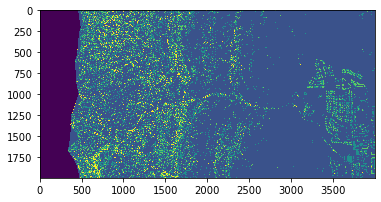

In [12]:
result_raster = ro.open("result_raster.tif","w",driver="GTIFF",
                     width= dsm.width,
                     height=dsm.height,
                     count= dsm.count,
                     crs= dsm.crs,
                     transform = dsm.transform,
                     dtype= dsm_data.dtype)
reclassified_raster.dtype= dsm_data.dtype
result_raster.write(reclassified_raster,1)
result_raster.close()

result = ro.open("./result_raster.tif")
show(result.read())